# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Purpose

In this exercise, I will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of my own 

### Sources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
****

In [1]:
%matplotlib inline

# general functionality
import pandas as pd
import numpy as np
import scipy.stats as st

# plotting
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

# don't show warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

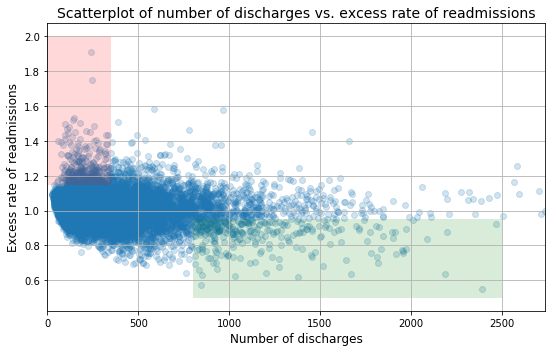

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [5]:
# change name of leaned dataframe for easier use
df = clean_hospital_read_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


****

## Preliminary Report

The following is a hypothetical report based on the provided data. I will form my analyses based on whether I agree or disagree with the folloeing statements and recommendations.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Analysis Framework

A. Do I agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for my arguments and my own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
****

### Let's step through the preliminary report and give responses/statistical analysis evidence accordingly:

**Note:** For these problems, I will assume that the language 'readmission rates' is referring to the 'Excess Readmission Ratio' column of the dataset. 

> **A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges

I disagree with this statement - even though hospitals/facilities with more discharges have fewer incidences of excess readmissions, this does not mean that hospitals/facilities with fewer discharges all have higher incidences of excess readmissions. If we look at hospitals/facilities with fewer readmissions, we see many with high exess readmissions ratios, but also a similar amount with low ratios. Therefore, it doesn't make sense to say that an overall trend exists without further exploration into the data.

> + With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

I agree with this statement - there are clearly more points in the red box area towards the left of the graph than the right of the graph.

> + With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

I cannot agree with this statement until more analysis is done - in the graph we see that there are many more hospitals/facilities with low discharge numbers than high. This leaves us with very uneven sample groups if we were to split up the points by low and high discharge numbers. We also see that hospitals/facilities with low discharge numbers have a large spread of high and low rates of readmissions. Therefore, it's hard to quantify from the graph whether there actually is a greater incidence of lower rates of readmission with higher numbers of discharges.

>**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

In [6]:
under_100 = df[df['Number of Discharges'] < 100]

mean_readmit = np.mean(under_100['Excess Readmission Ratio'])
ratio_over_one = (float(np.sum(under_100['Excess Readmission Ratio'] > 1))/float(len(under_100)))*100
print('For hospitals/facilities with number of discharges < 100:')
print('Mean readmission rate:', round(mean_readmit,3))
print('Excess readmission rate > 1:', round(ratio_over_one, 0), '%')

For hospitals/facilities with number of discharges < 100:
Mean readmission rate: 1.023
Excess readmission rate > 1: 59.0 %


The above analysis proves that the mean for the excess readmission rate for these facilities is indeed 1.023. Howver, the percentage of hospitals/facilties with a rate over 1 is 59%, not 63% as stated.

> + In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [7]:
over_1000 = df[df['Number of Discharges'] > 1000]

mean_readmit = np.mean(over_1000['Excess Readmission Ratio'])
ratio_over_one = (float(np.sum(over_1000['Excess Readmission Ratio'] > 1))/float(len(over_1000)))*100
print('For hospitals/facilities with number of discharges > 1000:')
print('Mean readmission rate:', round(mean_readmit,3))
print('Excess readmission rate > 1:', round(ratio_over_one, 0), '%')

For hospitals/facilities with number of discharges > 1000:
Mean readmission rate: 0.978
Excess readmission rate > 1: 44.0 %


The above analysis proves that the mean for the excess readmission rate for these facilities is indeed 0.978.and the percentage of hospitals/facilties with a rate over 1 is 44%, so both numbers are correct as stated.

>**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

We will conduct a hypothesis test of correlation to come to a conclusion on this statement, using the following hypotheses: 

H<sub>0</sub>: hospital capacity (number of discharges) and readmission rate are completely uncorrelated  
H<sub>a</sub>: hospital capacity (number of discharges) and readmission rate correlated

In [8]:
# conduct hypothesis test of correlation
# test statistic is the Pearson correlation coefficient (r)
df_test = df[df['Excess Readmission Ratio'].notnull()] # remove null values in dataset
alpha = 0.01
discharges = df_test['Number of Discharges'].astype(float)
readmit = df_test['Excess Readmission Ratio'].astype(float)
obs_r = np.corrcoef(discharges, readmit)[0,1]
print('Observed Pearson correlation coefficient between discharges and readmission ratio:', obs_r)

# use permutation to generate replicates of the data assuming no correlation is present
replicates = np.empty(10000)

for i in range(len(replicates)):
    # permute discharge data
    permuted = np.random.permutation(discharges)
    
    # compute r and add to replicates array
    replicates[i] = np.corrcoef(permuted, readmit)[0,1]
    
p_value = np.sum(replicates >= obs_r) / len(replicates)

print('p-value:', float(p_value))
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Observed Pearson correlation coefficient between discharges and readmission ratio: -0.09739794351079353
p-value: 1.0
Fail to reject null hypothesis


The p-value for this test is 1.0, meaning that we have evidence that number of discharges and excess readmission rate are **uncorrelated** variables. This makes sense given the previous graph, which shows that small hospitals have both high and low readmissions rates, while the very few points for larger hospitals/facilities makes it hard to draw definitive conclusions. Based on this evidence, there is proof that the claim made in the preliminary report is incorrect, or at least too vague.

> + Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

To investigate this question, we will conduct a hypothesis test to see if the mean excess readmission ratio is different between small hospitals/facilities (less than 300 discharges) and larger ones (more than 800 discharges). This follows the logic that hospitals with more people will have a higher number of people to discharge overall, and vice versa.

Hypotheses:
If X = readmission ratio in small hospitals  
and Y = readmission ratio in large hospitals,

H<sub>0</sub>: $u$<sub>X</sub> - $u$<sub>Y</sub> = 0  
H<sub>a</sub>: $u$<sub>X</sub> - $u$<sub>Y</sub> $\neq$ 0

In [9]:
small = df[df['Number of Discharges'] <= 300]
large = df[df['Number of Discharges'] >= 800]

small_dis = small[small['Excess Readmission Ratio'].notnull()]['Excess Readmission Ratio']
large_dis = large[large['Excess Readmission Ratio'].notnull()]['Excess Readmission Ratio']

# two-sample t-test
st.ttest_ind(small_dis, large_dis)

Ttest_indResult(statistic=9.174367343659634, pvalue=5.866125679715e-20)

The p-value for this test is **5.87e-20**. With $\alpha$ = 0.01, we reject the null hypothesis and conclude that there is a difference between the readmission ratios in large and small hospitals/facilities. This also supports the report's claim that some smaller hospitals may be lacking resources for adequate care.

To dig deeper into this question, let's consider the ways in which small and large hospitals/facilities may be different by looking at them through the lens of some of the other features in the dataset. One interesting feature to look into is 'Measure Name' - perhaps smaller hospitals/facilities take in patients with different diseases that larger ones.

In [10]:
small['Measure Name'].value_counts().sort_values(ascending=False)

READM-30-COPD-HRRP        1560
READM-30-PN-HRRP          1544
READM-30-HF-HRRP          1426
READM-30-AMI-HRRP         1255
READM-30-HIP-KNEE-HRRP     428
Name: Measure Name, dtype: int64

In [11]:
large['Measure Name'].value_counts().sort_values(ascending=False)

READM-30-HF-HRRP          320
READM-30-HIP-KNEE-HRRP    235
READM-30-PN-HRRP          160
READM-30-COPD-HRRP        131
READM-30-AMI-HRRP          57
Name: Measure Name, dtype: int64

In [12]:
np.mean(small_dis) - np.mean(large_dis)

0.028655567818077876

It looks like smaller hospitals/facilities measure 'READM-30-COPD-HRRP', 'READM-30-PN-HRRP', and 'READM-30-HF-HRRP' the most, while larger ones measure 'READM-30-HF-HRRP', 'READM-30-HIP-KNEE-HRRP', and 'READM-30-HIP-KNEE-HRRP' the most. If we look at the average readmissions rates for these particular measurements, that may provide some insight into the reason behind the differences in the two sizes of hospitals/facilities.

To give some context, the mean excess readmission rate betweeen small and large hospitals/facilties is only 0.0286. This very small difference led to a t-test result with a very, very small p-value. Therefore, we should treat small differences in numbers as important when comparing them.

In [13]:
# overall readmission ratios for measurements at small hospitals/facilities
print(df[df['Measure Name'] == 'READM-30-COPD-HRRP']['Excess Readmission Ratio'].mean())
print(df[df['Measure Name'] == 'READM-30-PN-HRRP']['Excess Readmission Ratio'].mean())
print(df[df['Measure Name'] == 'READM-30-HF-HRRP']['Excess Readmission Ratio'].mean())

1.0042877521085438
1.0047852635353163
1.003459830568306


In [14]:
# overall readmission ratios for measurements at large hospitals/facilities
print(df[df['Measure Name'] == 'READM-30-HF-HRRP']['Excess Readmission Ratio'].mean())
print(df[df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP']['Excess Readmission Ratio'].mean())
print(df[df['Measure Name'] == 'READM-30-PN-HRRP']['Excess Readmission Ratio'].mean())

1.003459830568306
1.0277585703865788
1.0047852635353163


We see from the calculations of the overall mean excess readmissions rates for each size group's most popular measurements that small hospitals/faciities tend to treat patients with afflictions that have much higher readmission than large hospitals/facilities. This may be due to smaller hospitals/facilities having less capacity for certain types of medical procedures.

This is strong evidence that 'Measurement Name' is a **confounding variable** that gave us a false impression that excess readmission rates were solely due to a hospital/facility's size.

>**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

Based on the previous analysis that showed that readmissions rates are different between small and large facilities, I agree with this recommendation. Because we know that small hospitals/facilities tend to treat different diseases than large facilities, it would improve small facilities' readmission rates if they gain the resources to treat more of the diseases with lower readmission rates.

> + Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

I agree with this recommendation. Because small and large hospitals tend to treat different proportions of diseases with different readmissions rates, it would balance out this disparity by having smaller facilities merge with larger ones.

### Statistical vs. Practical Significance

_Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?_

When considering a non-theoretical problem that has the potential to impact many people, it's important to weigh the practical implications against the statistical conclusions. For example, consider hypothesis test for whether someone should be released on bail or not. In this case, a false positive, will result in an innocent person spending time in jail, arguably a much worse outcome than a false negative, in which someone remains free. In a case where the implications of a test are so different, it would be better to set an $\alpha$ that lowers the risk of Type I error as much as possible. More broadly, it's important to consider who is being affected by the conclusions of a statistical analysis, and how they are being affected.

In this case, statistical significance and practical significance align. If hospitals are deemed to have high excess readmission rates because of poor resources, the money spent on improving resources would save many priceless lives. But this conclusion should also come on a case by case basis - some areas may have budgets that make resource improvement impossible.

This doesn't change my recommendation other than to have the conclusions applied to each hospital/factility on an individual basis within the context of that hospital/facility's community.

### Scatterplot

_Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?_

Because there are so many points in the dataset and the representation among small and large hospitals/facilities is not equal, the scatterplot fails to effectively communicate any differences between small and large facilities' excess readmissions rates. This requires the reader of the graph to spend extra time trying to interpret the information. It would be easier to agggregate and standardize the data among hospitals/facilities of different sizes so that the readmissions rates can be easily compared. I'll graph the data with a [smoothing function](https://plot.ly/python/smoothing/) to reveal the larger trends in the thousands of data points.


In [15]:
# plotly triangular moving average function
def smoothTriangle(data, degree, dropVals=False):
    """ Computes the triangular moving average for a dataset,
        which computes several simple moving averages on top of each other.
        See https://plot.ly/python/smoothing/ for more information.
    """
    triangle=np.array(list(range(degree)) + [degree] + list(range(degree)[::-1])) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    if dropVals:
        return smoothed
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [16]:
# generate a scatterplot for number of discharges vs. average excess rate of readmissions

# make list of number of discharges and average ratio
grouped = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].groupby(['Number of Discharges']).mean()
grouped.reset_index(inplace=True)
x = list(grouped['Number of Discharges'])
y = list(grouped['Excess Readmission Ratio'])

data = go.Scatter(x=x,
                  y=smoothTriangle(y, 75),
                  mode='markers',
                  marker=dict(size=6, color='#C190F0', symbol='triangle-up'),
                  name='Moving Triangle - Degree 75')

layout = go.Layout(title='Discharges vs. readmissions rate (smoothed)',
                   xaxis=dict(title='Number of discharges'),
                   yaxis=dict(title='Excess rate of readmissions'),
                   showlegend=False)

fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

Since plotly plots don't render on Github, I will show the png file of the plot here:
![plot](smoothed_plot.png)

The above plot gives a much better interpretation of the overarching trends in the data, and we do in fact see a decline in readmissions rate as the number of discharges increases. This supports our recommendations for investigating the resources and practices in some smaller hospitals/facilities.